In [10]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt

zillow = pd.read_csv('~/Desktop/NYCDSA/Capstone/data/zillow-long.csv')
acs_zip = pd.read_csv('~/Desktop/NYCDSA/Capstone/data/zipcode_census_data_2018_5yr.csv')
acs2 = pd.read_csv('~/Desktop/NYCDSA/Capstone/data/zipcode_2.csv')

In [11]:
zillow.head()

,RegionID,SizeRank,State,City,zipcodes,date,rent
0,61639,1,NY,New York,10025,2014-01,3062.0
1,84654,2,IL,Chicago,60657,2014-01,1544.0
2,61637,3,NY,New York,10023,2014-01,3104.0
3,91982,4,TX,Houston,77494,2014-01,1738.0
4,84616,5,IL,Chicago,60614,2014-01,1702.0


In [18]:
zipcodes = acs2['geo_id'].astype(str)
zipcodes = ['0'+x if len(x) == 4 else x for x in zipcodes]
zipcodes = ['00'+x if len(x) == 3 else x for x in zipcodes]
acs2['geo_id'] = zipcodes

In [37]:
acs2.columns.to_list()[81:99]

['median_income',
 'income_per_capita',
 'income_less_10000',
 'income_10000_14999',
 'income_15000_19999',
 'income_20000_24999',
 'income_25000_29999',
 'income_30000_34999',
 'income_35000_39999',
 'income_40000_44999',
 'income_45000_49999',
 'income_50000_59999',
 'income_60000_74999',
 'income_75000_99999',
 'income_100000_124999',
 'income_125000_149999',
 'income_150000_199999',
 'income_200000_or_more']

In [43]:
zipcodes = zillow['zipcodes'].astype(str)
zipcodes = ['0'+x if len(x) == 4 else x for x in zipcodes]
zillow['zipcodes'] = zipcodes

In [48]:
df = zillow[['State','City','zipcodes','date','rent']].copy()

In [59]:
df2 = df[df.date == '2014-01']
df2 = df2.drop('date',axis=1)
df2.head()

,State,City,zipcodes,rent
0,NY,New York,10025,3062.0
1,IL,Chicago,60657,1544.0
2,NY,New York,10023,3104.0
3,TX,Houston,77494,1738.0
4,IL,Chicago,60614,1702.0


In [144]:
acs = acs2[['geo_id','do_date','total_pop','median_age','median_income']]

In [145]:
census = df2.merge(right = acs, how = 'left', left_on = 'zipcodes', right_on = 'geo_id')

In [146]:
census = census.drop('geo_id',axis=1).drop('do_date',axis=1)

In [147]:
census.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [148]:
census

,State,City,zipcodes,rent,total_pop,median_age,median_income
0,NY,New York,10025,3062.00,92805.0,41.3,85930.0
1,IL,Chicago,60657,1544.00,70052.0,31.2,92295.0
2,NY,New York,10023,3104.00,62435.0,43.3,130452.0
3,TX,Houston,77494,1738.00,114989.0,34.9,139669.0
4,IL,Chicago,60614,1702.00,71308.0,30.3,107461.0
...,...,...,...,...,...,...,...
2603,MA,Boston,02108,2484.00,4082.0,35.1,136667.0
2604,CA,Los Angeles-Long Beach-Anaheim,90067,7832.89,2314.0,61.8,129306.0
2605,MA,Boston,02110,4014.00,2449.0,53.8,116932.0
2606,DC,Washington,20004,2213.07,1975.0,40.7,147522.0


In [106]:
target = np.array(np.log(census.rent)).reshape(-1, 1)
features = np.array(np.log(census.median_income)).reshape(-1, 1)

In [99]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression() # another way to import this module

'''FIT THE MODEL'''


ols.fit(features,target) # may need to np.reshape(-1,1)

'''ONCE FIT, NEW OUTPUT'''
print(ols.coef_) # coefficient
print(ols.intercept_) # intercept

print(ols.score(features,target))

[[0.61239893]]
[0.35804497]
0.48458258148674127


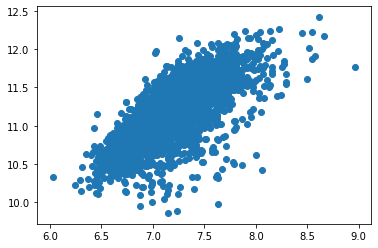

In [101]:
plt.scatter(target,features)

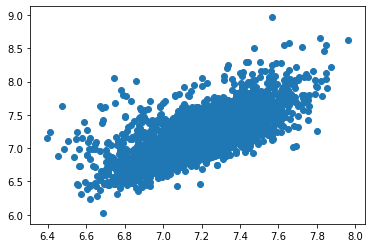

In [102]:
plt.scatter(ols.predict(features),target)

In [116]:
features2 = census[['median_income','median_age','total_pop']].copy()
features2['median_income'] = np.log(features2['median_income'])

In [119]:
ols.fit(features2,target)
ols.score(features2,target)

0.48712692935895846

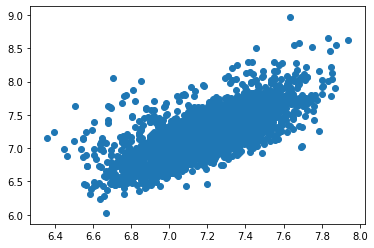

In [120]:
plt.scatter(ols.predict(features2),target)

# with ethan's df

In [129]:
acs_final = acs_zip[['geo_id','total_pop','median_age','median_income']].copy()
zipcodes = acs_zip['geo_id'].astype(str)
zipcodes = ['0'+x if len(x) == 4 else x for x in zipcodes]
zipcodes = ['00'+x if len(x) == 3 else x for x in zipcodes]
acs_final['geo_id'] = zipcodes

In [150]:
acs_final

,geo_id,total_pop,median_age,median_income
0,87537,2510.0,42.1,NaN
1,87017,346.0,50.9,NaN
2,87528,3505.0,27.9,NaN
3,87533,133.0,25.8,NaN
4,87511,2896.0,36.0,NaN
...,...,...,...,...
4082,80809,1185.0,54.1,58813.0
4083,62340,1894.0,43.1,51932.0
4084,13343,1772.0,46.6,59167.0
4085,95421,1681.0,56.6,55833.0


In [141]:
df3 = df2.copy()
df3

,State,City,zipcodes,rent
0,NY,New York,10025,3062.00
1,IL,Chicago,60657,1544.00
2,NY,New York,10023,3104.00
3,TX,Houston,77494,1738.00
4,IL,Chicago,60614,1702.00
...,...,...,...,...
2603,MA,Boston,02108,2484.00
2604,CA,Los Angeles-Long Beach-Anaheim,90067,7832.89
2605,MA,Boston,02110,4014.00
2606,DC,Washington,20004,2213.07


In [149]:
df3.merge(acs_final, "left", left_on='zipcodes', right_on='geo_id')

,State,City,zipcodes,rent,geo_id,total_pop,median_age,median_income
0,NY,New York,10025,3062.00,NaN,NaN,NaN,NaN
1,IL,Chicago,60657,1544.00,NaN,NaN,NaN,NaN
2,NY,New York,10023,3104.00,NaN,NaN,NaN,NaN
3,TX,Houston,77494,1738.00,NaN,NaN,NaN,NaN
4,IL,Chicago,60614,1702.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2603,MA,Boston,02108,2484.00,NaN,NaN,NaN,NaN
2604,CA,Los Angeles-Long Beach-Anaheim,90067,7832.89,NaN,NaN,NaN,NaN
2605,MA,Boston,02110,4014.00,NaN,NaN,NaN,NaN
2606,DC,Washington,20004,2213.07,NaN,NaN,NaN,NaN


# new query

In [156]:
acs_new = pd.read_csv('~/Desktop/NYCDSA/Capstone/data/zipcodes_correct.csv')
acs_new = acs_new.drop('geo_id',axis=1)

In [179]:
acs_new = acs_new[acs_new['state_code'] != 'PR'].copy()

In [187]:
acs_new['zip_code'] = ['0'+x if len(x) == 4 else x for x in acs_new['zip_code'].astype(str)]

In [190]:
df3 = df3.merge(acs_new, 'left', left_on = 'zipcodes', right_on ='zip_code')

In [203]:
#df3[df3.isnull().any(axis=1)]
df3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [204]:
target = np.array(df3['rent']).reshape(-1,1)
feat1 = np.array(df3['median_income']).reshape(-1,1)
features = df3[['median_income','median_age','total_pop']]

In [206]:
ols.fit(feat1,target)
ols.score(feat1, target)

0.4609696380862834

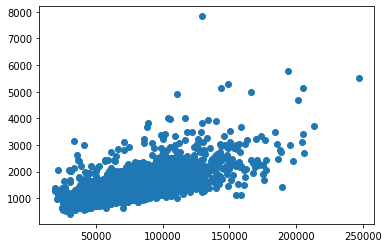

In [211]:
plt.scatter(feat1,target)

In [210]:
ols.fit(np.log(feat1), np.log(target))
ols.score(np.log(feat1), np.log(target))

0.48458258148674127

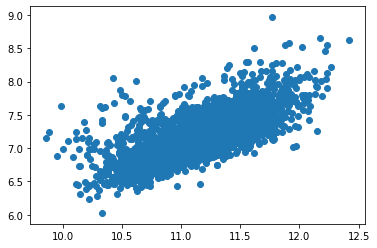

In [209]:
plt.scatter(np.log(feat1),np.log(target))